# KNN Classification

In [1]:
import pandas as pd
## plotting libraries
from matplotlib import pyplot as plt
## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 1230  # specifies a sampling for repeatable results

In [3]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')

In [4]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

In [7]:
churnData['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
import numpy as np
numeric_df= churnData.select_dtypes(np.number)
numeric_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


### Check whether there are any NaNs

In [9]:
churnData.isnull().values.any()

True

### Filling NaNs with means of the column

In [10]:
churnData = churnData.fillna(churnData.mean())

In [11]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
X.isna().any()

SeniorCitizen     False
tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

### Looking into the 4 columns: tenure, SeniorCitizen, MonthlyCharges, TotalCharges 

In [29]:
X = numeric_df


In [30]:
X = X.fillna(X.mean())

In [14]:
y = churnData['Churn']

In [15]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [16]:
X.round()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,30.0,30.0
1,0,34,57.0,1890.0
2,0,2,54.0,108.0
3,0,45,42.0,1841.0
4,0,2,71.0,152.0
...,...,...,...,...
7038,0,24,85.0,1990.0
7039,0,72,103.0,7363.0
7040,0,11,30.0,346.0
7041,1,4,74.0,307.0


In [17]:
# target variable is malignant or benign (binary label).
# let's check the distribution of labels
y.value_counts(normalize=True)
#y.value_counts(normalize=False)
#1 is benign 
#0 is malignant 

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

### train/test split

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) # splitting the data into train and test sets

### Scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [34]:
# transform X_train
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Knn_Classification

In [35]:
X_train_scaled.max()

2.7855340405052402

In [43]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [37]:
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [38]:
y_pred[0:5]

array(['Yes', 'No', 'No', 'No', 'No'], dtype=object)

In [39]:
y_test.head(5)

6610     No
4944     No
4282     No
5799    Yes
5403     No
Name: Churn, dtype: object

### Confusion matrices

Confusion matrices allow us to visualize how the model performs by showing how the predicted labels compare with the test labels.
The false positives (upper right corners) and false negatives (lower left corners) impact the precision and recall scores.

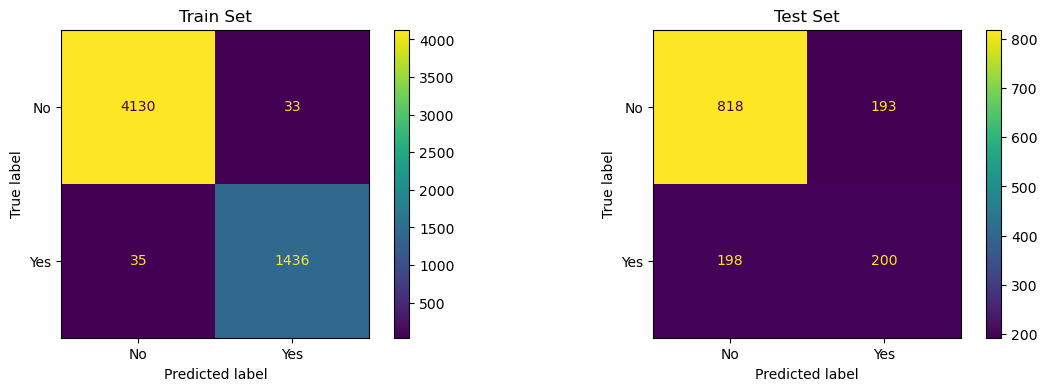

In [44]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

Train results: 19 predictions where the model missed a malignant case and 0 cases where the model predicted cancer where the was none.
Test results: 5 predictions where the model misclassified malignant records and 2 cases where the model predicted a cancer where there was none.

### Performance Metrics

In [45]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test, pos_label='Yes')]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [46]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.99,0.72
1,Precision,0.98,0.51
2,Recall,0.98,0.50


In [47]:
y_train_vs_predicted # train labels

,Real,Predicted
7000,No,No
309,No,No
2302,No,No
5894,Yes,Yes
4522,No,No
...,...,...
4137,No,No
4833,No,No
2907,Yes,Yes
6909,No,No


In [48]:
y_test_vs_predicted # test labels

,Real,Predicted
6610,No,Yes
4944,No,No
4282,No,No
5799,Yes,No
5403,No,No
...,...,...
4358,No,Yes
3851,No,No
4830,No,No
4376,No,Yes


### Making a function for KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

def knn_classification(X_train_scaled, y_train, X_test_scaled, n_neighbors=15):
    # Create a KNN classifier with n_neighbors=15 and uniform weights
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='uniform')
    
    # Fit the model on the training data
    model.fit(X_train_scaled, y_train)
    
    # Predict the classes for the test data and training data
    y_pred_test = model.predict(X_test_scaled)
    y_pred_train = model.predict(X_train_scaled)
    
    return y_pred_test, y_pred_train


In [97]:
y_pred_test, y_pred_train = knn_classification(X_train_scaled, y_train, X_test_scaled, n_neighbors=15)

In [93]:
y_pred_test

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [94]:
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [98]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.81,0.72
1,Precision,0.70,0.51
2,Recall,0.50,0.50


### Making the logistic regression 

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

,Error_metric,Train,Test
0,Accuracy,0.79,0.80
1,Precision,0.65,0.70
2,Recall,0.43,0.46


Confusion matrix for the train set
[[3800  343]
 [ 847  644]]


Confusion matrix for the test set
[[957  74]
 [206 172]]


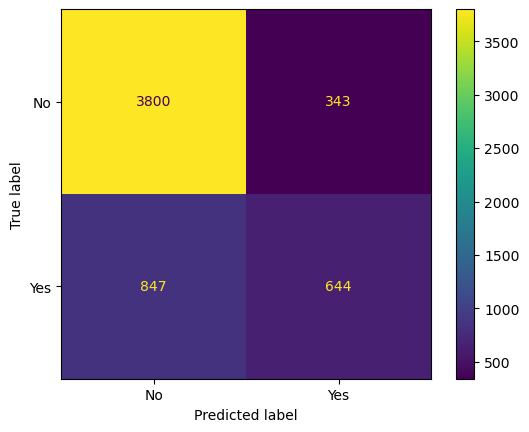

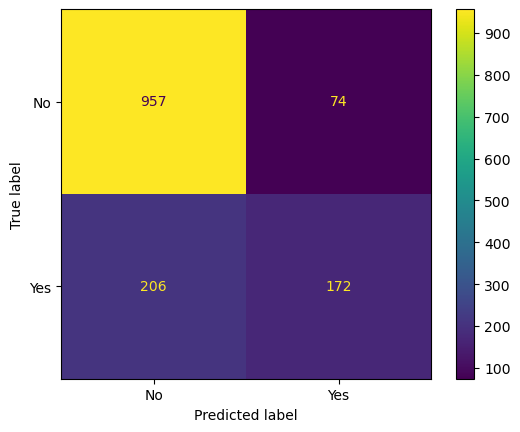

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log, pos_label='Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')


print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')

### Making the decision tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


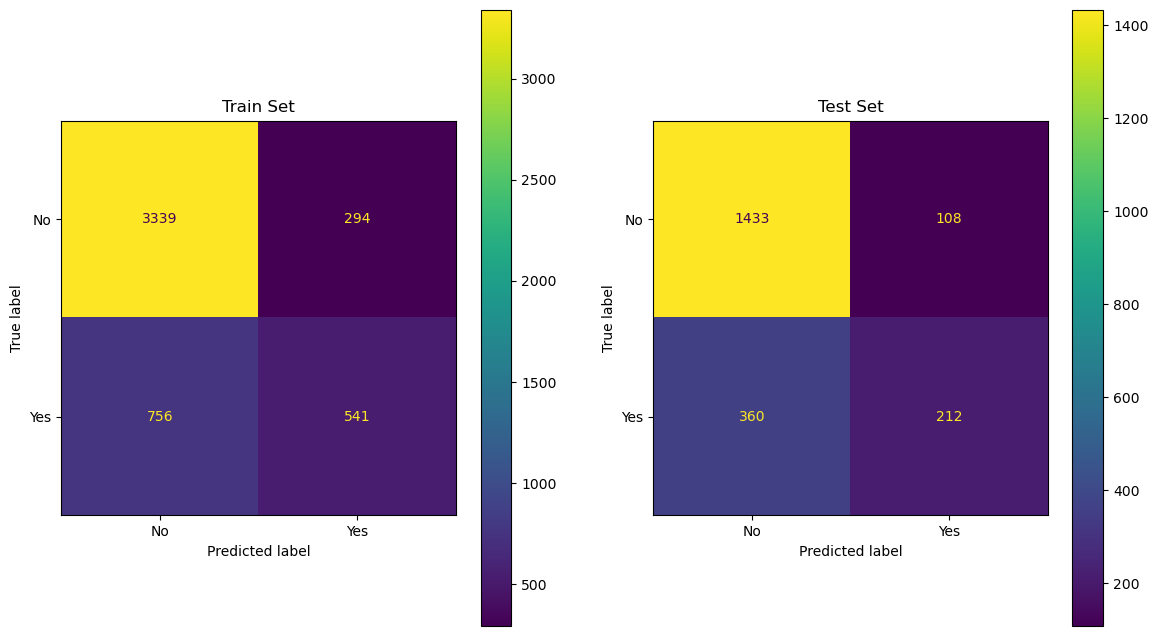

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt, pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt, pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt, pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt, pos_label='Yes')]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Feature importances

<BarContainer object of 4 artists>

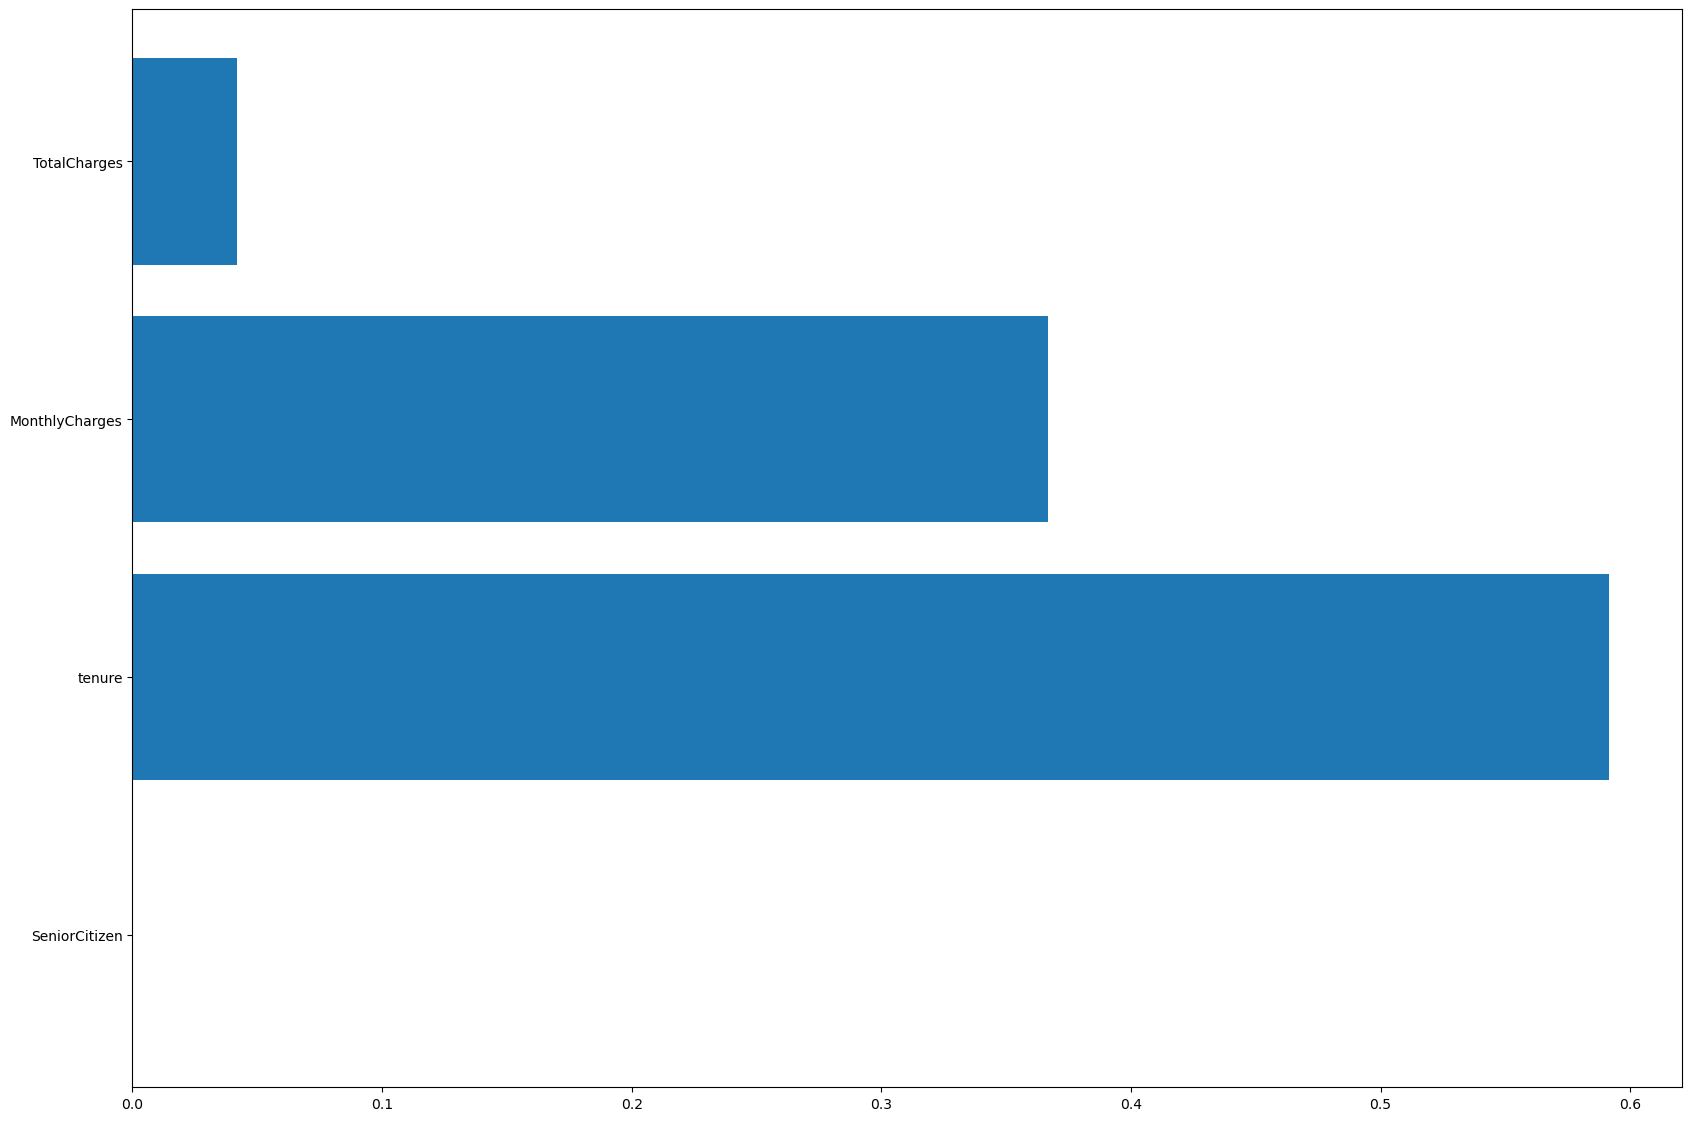

In [57]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

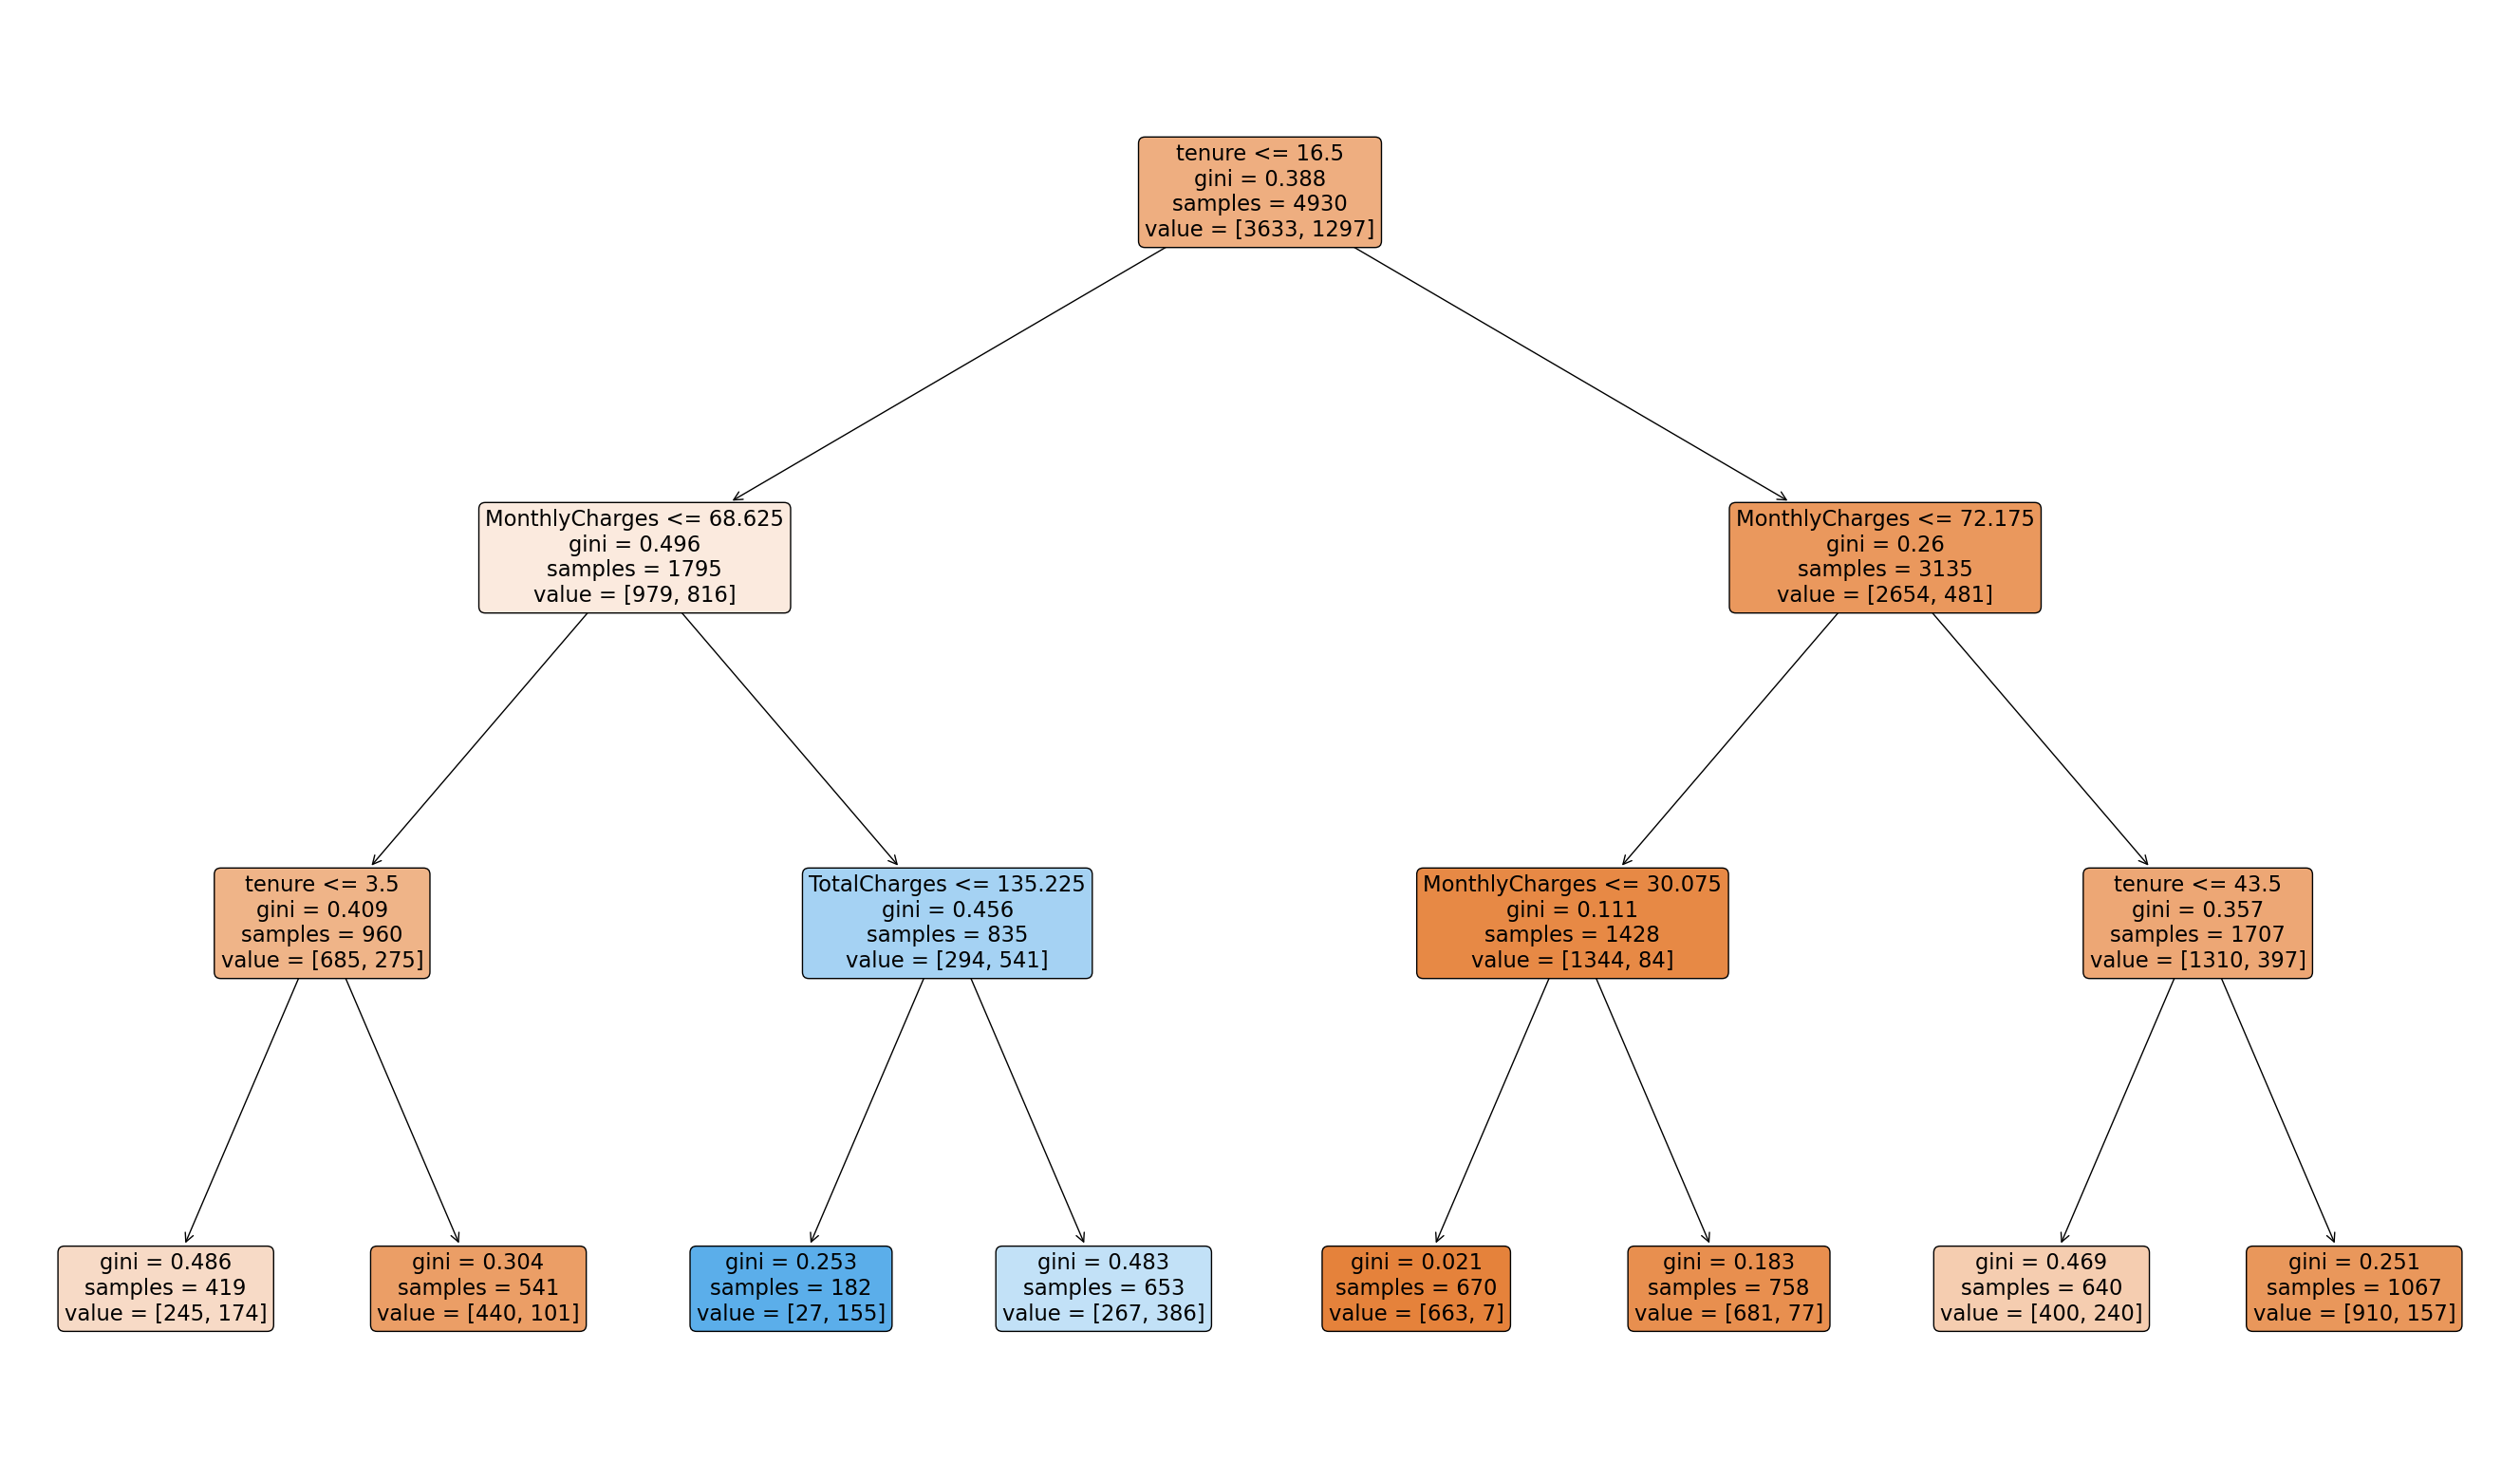

In [58]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

In [63]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

performance_dfs = []

for depth in range(1, 6):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                                   'Train': [accuracy_score(y_train, y_pred_train_dt),
                                             precision_score(y_train, y_pred_train_dt, pos_label='Yes'),
                                             recall_score(y_train, y_pred_train_dt, pos_label='Yes')],
                                   'Test': [accuracy_score(y_test, y_pred_test_dt),
                                            precision_score(y_test, y_pred_test_dt, pos_label='Yes'),
                                            recall_score(y_test, y_pred_test_dt, pos_label='Yes')]})
    
   
    performance_dfs.append(performance_df)


for i, df in enumerate(performance_dfs):
    print(f"Performance metrics for decision tree with depth = {i+1}")
    display(df)

Performance metrics for decision tree with depth = 1


,Error_metric,Train,Test
0,Accuracy,0.74,0.73
1,Precision,0.00,0.00
2,Recall,0.00,0.00


Performance metrics for decision tree with depth = 2


,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


Performance metrics for decision tree with depth = 3


,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.65,0.66
2,Recall,0.42,0.37


Performance metrics for decision tree with depth = 4


,Error_metric,Train,Test
0,Accuracy,0.79,0.78
1,Precision,0.66,0.66
2,Recall,0.43,0.41


Performance metrics for decision tree with depth = 5


,Error_metric,Train,Test
0,Accuracy,0.80,0.77
1,Precision,0.69,0.64
2,Recall,0.45,0.39
